## Data Collection and Preprocessing**

Import library, metrics, and exclude warnings 

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
#Import libraries and metrics
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,roc_curve, classification_report
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [9]:
pd.options.mode.chained_assignment = None

## Tesco Plc,Inc Historical Data**

Download data from Yahoo Finance 

In [10]:
tscodata = yf.download('TSCO', start="2014-01-01", end='2023-12-31')
tscodata

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,77.599998,77.720001,76.129997,76.800003,66.700439,855300
2014-01-03,76.559998,76.870003,76.089996,76.480003,66.422523,743700
2014-01-06,77.000000,77.389999,75.349998,75.459999,65.536636,675600
2014-01-07,75.900002,76.610001,75.639999,75.930000,65.944817,733500
2014-01-08,76.529999,76.639999,75.379997,76.349998,66.309601,780100
...,...,...,...,...,...,...
2023-12-22,212.690002,215.320007,211.330002,211.919998,210.947525,1004900
2023-12-26,211.500000,212.570007,210.619995,210.729996,209.762970,849700
2023-12-27,210.729996,213.789993,209.000000,212.639999,211.664215,829300


## Feature Engineering

Data Reduction 

In [11]:
tscodata = tscodata.dropna() 
tscoata = tscodata[['Volume','Open', 'High', 'Low', 'Close']]
tscodata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,77.599998,77.720001,76.129997,76.800003,66.700439,855300
2014-01-03,76.559998,76.870003,76.089996,76.480003,66.422523,743700
2014-01-06,77.000000,77.389999,75.349998,75.459999,65.536636,675600
2014-01-07,75.900002,76.610001,75.639999,75.930000,65.944817,733500
2014-01-08,76.529999,76.639999,75.379997,76.349998,66.309601,780100
...,...,...,...,...,...,...
2023-12-22,212.690002,215.320007,211.330002,211.919998,210.947525,1004900
2023-12-26,211.500000,212.570007,210.619995,210.729996,209.762970,849700
2023-12-27,210.729996,213.789993,209.000000,212.639999,211.664215,829300


Future Creation 

In [12]:
tscodata['H-L'] = tscodata['High'] - tscodata['Low'] 
tscodata['O-C'] =tscodata['Close'] - tscodata['Open'] 

tscodata['2day MA'] = tscodata['Close'].shift(1).rolling(window = 2).mean() 
tscodata['20day MA'] = tscodata['Close'].shift(1).rolling(window = 20).mean() 
tscodata['200day MA'] = tscodata['Close'].shift(1).rolling(window = 200).mean() 

tscodata['Std_dev']= tscodata['Close'].rolling(5).std() 

tscodata['Price_Rise'] = np.where(tscodata['Close'].shift(-1) >tscodata['Close'], 1, 0)

tscodata = tscodata.dropna() 
tscodata

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,2day MA,20day MA,200day MA,Std_dev,Price_Rise
Date,,,,,,,,,,,,,
2014-10-17,58.950001,59.470001,58.099998,58.830002,51.456417,819400,1.370003,-0.119999,58.049999,59.905500,65.73915,0.693831,1
2014-10-20,59.520000,60.790001,59.500000,60.419998,52.847134,1302100,1.290001,0.899998,58.680000,59.796000,65.64930,1.144617,1
2014-10-21,60.250000,61.560001,59.570000,61.459999,53.756783,1108900,1.990002,1.209999,59.625000,59.802000,65.56900,1.557841,0
2014-10-22,61.570000,62.369999,61.009998,61.299999,53.616833,1724400,1.360001,-0.270000,60.939999,59.874500,65.49900,1.366517,1
2014-10-23,68.000000,71.930000,67.849998,71.000000,62.101051,6512300,4.080002,3.000000,61.379999,59.858500,65.42585,4.809233,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,212.690002,215.320007,211.330002,211.919998,210.947525,1004900,3.990005,-0.770004,210.739998,210.277002,217.84185,2.767223,0
2023-12-26,211.500000,212.570007,210.619995,210.729996,209.762970,849700,1.950012,-0.770004,211.809998,210.963502,217.76690,2.437352,1
2023-12-27,210.729996,213.789993,209.000000,212.639999,211.664215,829300,4.789993,1.910004,211.324997,211.611002,217.68435,1.113634,1


## EDA of Created Features

Figure 1:Plots Close Price and Volume

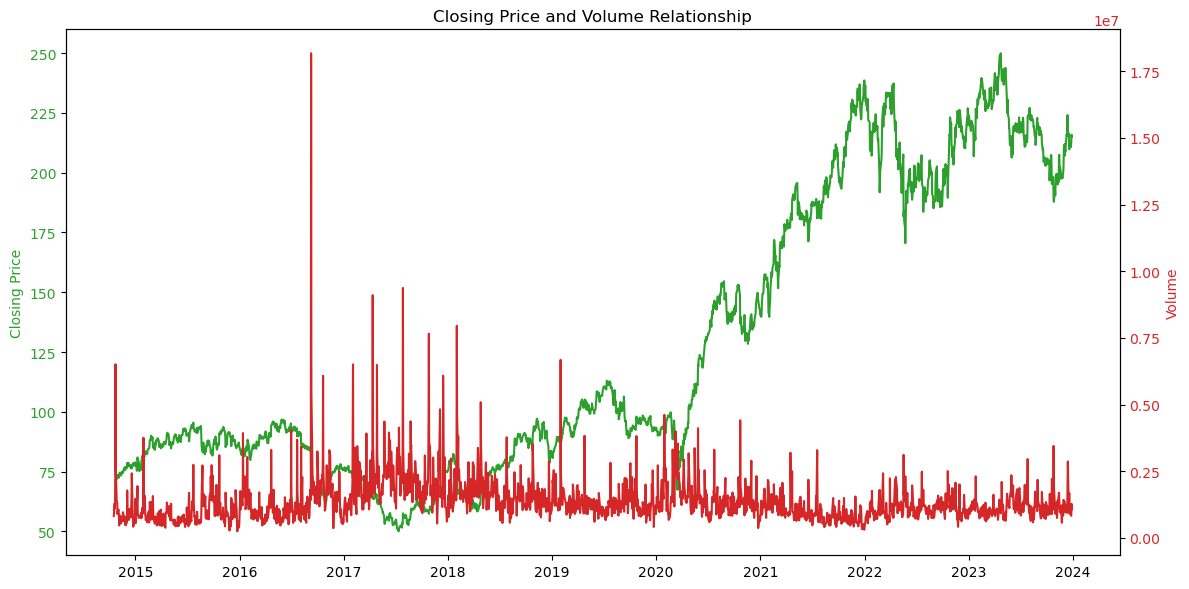

In [13]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:green'
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(tscodata['Close'], label='Close', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)
ax2.plot(tscodata['Volume'], label='Volume', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Closing Price and Volume Relationship')
fig.tight_layout()
plt.show()


Figure 2: Plot for 3day, 10day,30day MA 

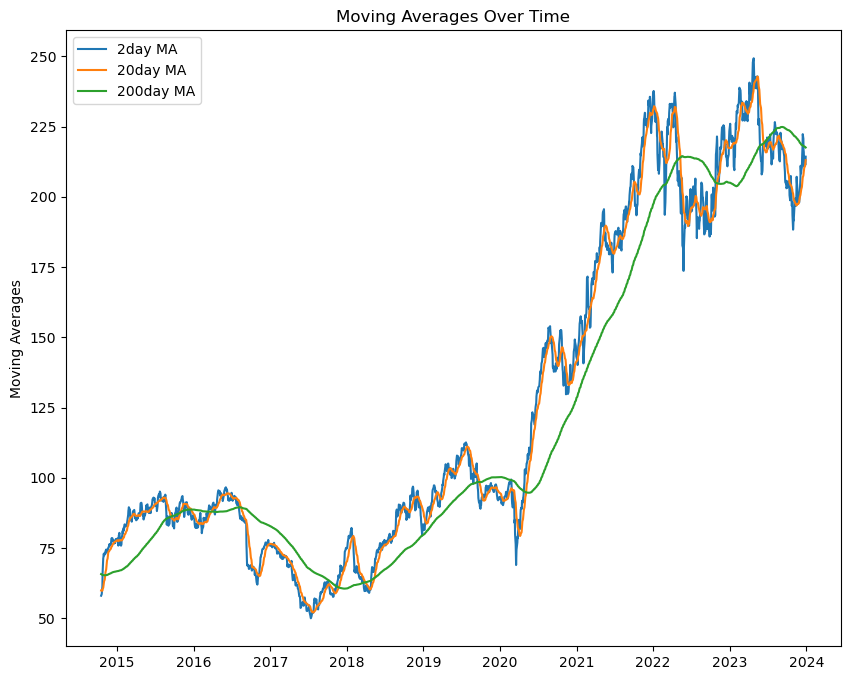

In [14]:
plt.figure(figsize=(10,8 ))

plt.plot(tscodata['2day MA'], label='2day MA')
plt.plot(tscodata['20day MA'], label='20day MA')
plt.plot(tscodata['200day MA'], label='200day MA')

plt.title('Moving Averages Over Time')
plt.ylabel('Moving Averages')
plt.legend()
plt.show()

Figure 3: Plots for O-C,H-L and Std_dev

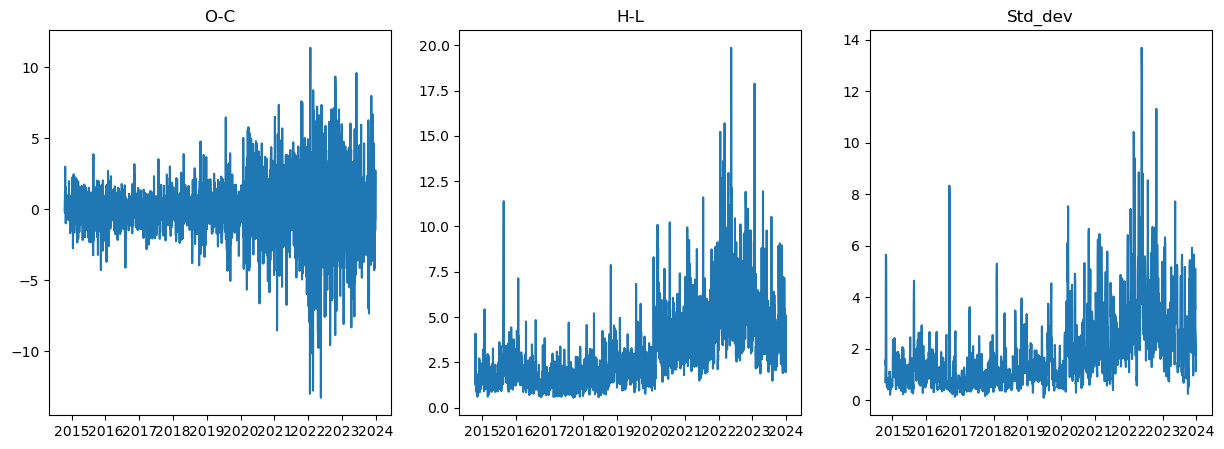

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(tscodata['O-C'])
axes[0].set_title('O-C')
axes[1].plot(tscodata['H-L'])
axes[1].set_title('H-L')
axes[2].plot(tscodata['Std_dev'])
axes[2].set_title('Std_dev')

plt.show()

Figure 4: 2day, 20day,200day MA histogram and density

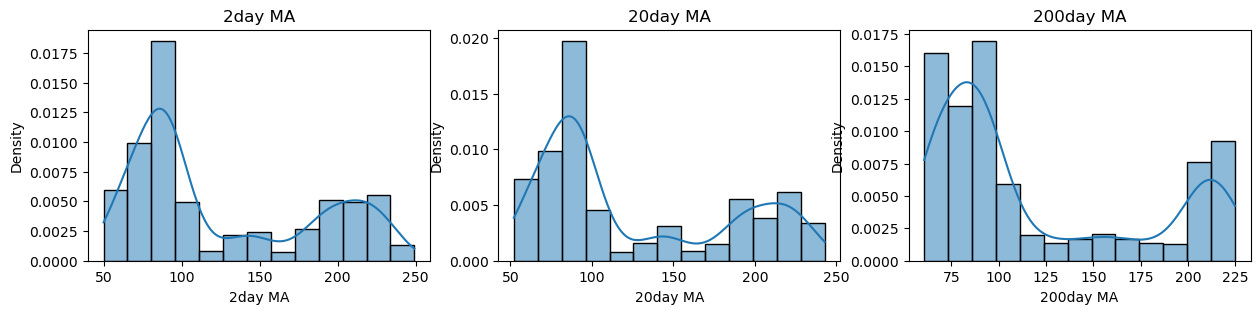

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))  # 1 row, 3 columns

sns.histplot(data=tscodata, x="2day MA", kde=True, stat="density", ax=axes[0])
axes[0].set_title('2day MA')

sns.histplot(data=tscodata, x="20day MA", kde=True, stat="density", ax=axes[1])
axes[1].set_title('20day MA')

sns.histplot(data=tscodata, x="200day MA", kde=True, stat="density", ax=axes[2])
axes[2].set_title('200day MA')

plt.show()

Figure 5: 2day, 20day,200day MA histogram and density

/Users/elsa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/elsa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


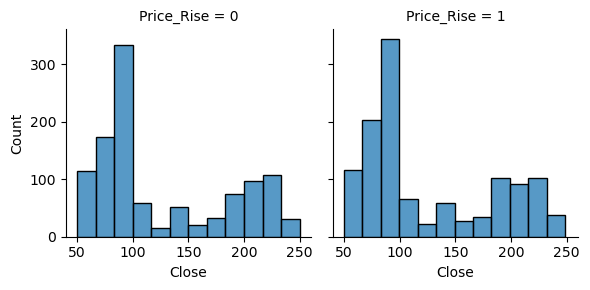

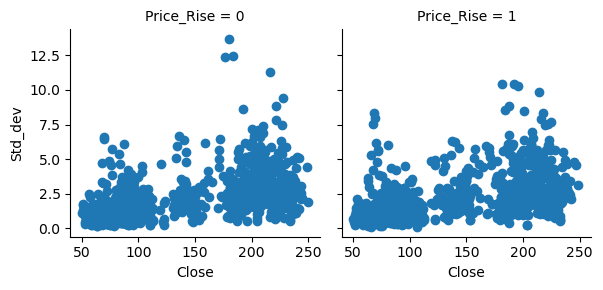

In [17]:
chart = sns.FacetGrid(tscodata, col='Price_Rise')  
chart.map(sns.histplot, 'Close') 

chart = sns.FacetGrid(tscodata, col='Price_Rise')  
chart.map(plt.scatter, 'Close','Std_dev')  

Fig 6: Descriptive Statistics of the Data set (description and information)

In [18]:
tscodata.describe()

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,2day MA,20day MA,200day MA,Std_dev,Price_Rise
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2.316000e+03,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000
mean,126.219080,127.726550,124.675976,126.246360,118.974664,1.366691e+06,3.050574,0.027280,126.144605,125.543958,119.836254,1.895117,0.520725
std,59.058841,59.722936,58.296653,59.039781,59.692883,8.468902e+05,2.152158,2.192313,59.008398,58.760139,56.149951,1.571124,0.499678
min,50.290001,50.610001,49.869999,49.990002,45.062073,2.461000e+05,0.540001,-13.289993,50.020000,52.110500,60.556050,0.085617,0.000000
25%,81.209999,83.035000,80.235001,81.489998,73.070110,8.894000e+05,1.489998,-0.919998,81.612500,80.943125,77.255350,0.793614,0.000000
50%,94.140003,95.274998,93.200001,94.154999,87.011570,1.183350e+06,2.400002,0.029999,94.110001,93.665750,91.868400,1.415307,1.000000
75%,189.652496,192.362495,187.430004,190.047504,183.349373,1.592950e+06,4.039995,1.000000,189.879999,190.901375,171.931062,2.485196,1.000000
max,249.470001,251.169998,247.699997,249.970001,245.140305,1.817240e+07,19.860001,11.380005,249.279999,242.763000,224.841600,13.685841,1.000000


In [19]:
tscodata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2316 entries, 2014-10-17 to 2023-12-29
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2316 non-null   float64
 1   High        2316 non-null   float64
 2   Low         2316 non-null   float64
 3   Close       2316 non-null   float64
 4   Adj Close   2316 non-null   float64
 5   Volume      2316 non-null   int64  
 6   H-L         2316 non-null   float64
 7   O-C         2316 non-null   float64
 8   2day MA     2316 non-null   float64
 9   20day MA    2316 non-null   float64
 10  200day MA   2316 non-null   float64
 11  Std_dev     2316 non-null   float64
 12  Price_Rise  2316 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 253.3 KB


Fig 7: Correlation matrix of data variables

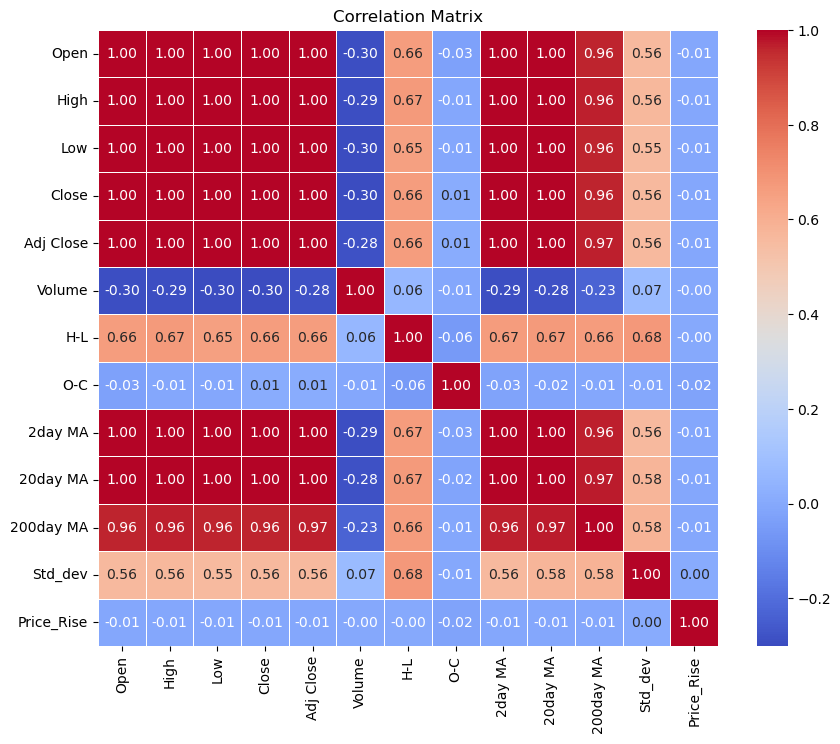

In [20]:
corr_matrix = tscodata.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Machine Learning Classification Methods**

Data Preprocessing

In [21]:
#Set target variable y(Price_Rise 0 or 1 )and features x 
#(from H-L column to Std_dev column)
X = tscodata.iloc[:, 5:-1] 
Y = tscodata.iloc[:, -1]

In [22]:
X

,Volume,H-L,O-C,2day MA,20day MA,200day MA,Std_dev
Date,,,,,,,
2014-10-17,819400,1.370003,-0.119999,58.049999,59.905500,65.73915,0.693831
2014-10-20,1302100,1.290001,0.899998,58.680000,59.796000,65.64930,1.144617
2014-10-21,1108900,1.990002,1.209999,59.625000,59.802000,65.56900,1.557841
2014-10-22,1724400,1.360001,-0.270000,60.939999,59.874500,65.49900,1.366517
2014-10-23,6512300,4.080002,3.000000,61.379999,59.858500,65.42585,4.809233
...,...,...,...,...,...,...,...
2023-12-22,1004900,3.990005,-0.770004,210.739998,210.277002,217.84185,2.767223
2023-12-26,849700,1.950012,-0.770004,211.809998,210.963502,217.76690,2.437352
2023-12-27,829300,4.789993,1.910004,211.324997,211.611002,217.68435,1.113634


In [23]:
Y #Price Rise

Date
2014-10-17    1
2014-10-20    1
2014-10-21    0
2014-10-22    1
2014-10-23    1
             ..
2023-12-22    0
2023-12-26    1
2023-12-27    1
2023-12-28    0
2023-12-29    0
Name: Price_Rise, Length: 2316, dtype: int64

In [24]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
                                   shuffle=True)
X_test


,Volume,H-L,O-C,2day MA,20day MA,200day MA,Std_dev
Date,,,,,,,
2022-12-13,1091300,9.789993,-6.110001,216.395004,220.054001,205.223549,2.355040
2020-07-08,734600,2.739990,1.460007,133.994995,127.641499,98.452800,1.277198
2022-10-26,1116600,7.490005,0.570007,211.059998,198.269999,205.025849,11.313404
2016-05-06,712200,1.269997,0.440002,94.005001,92.313500,87.983600,0.964949
2016-03-08,826000,1.729996,0.619995,86.555000,84.753500,87.968500,0.696601
...,...,...,...,...,...,...,...
2017-08-09,1749900,0.919998,0.030003,56.170000,53.893000,65.927450,0.689841
2019-04-16,1623600,1.559998,0.919998,104.369999,97.749000,88.500600,1.584147
2018-03-22,1961600,1.760002,-1.649998,62.344999,64.087000,62.711250,1.632886


In [25]:
# Standardize the features (optional but can be beneficial for 
#logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_test

array([[-0.32322901,  3.05925992, -2.73705732, ...,  1.59598541,
         1.49494367,  0.25574273],
       [-0.73070346, -0.16043328,  0.64163976, ...,  0.02161978,
        -0.39728699, -0.4128465 ],
       [-0.29432768,  2.00886959,  0.24440919, ...,  1.22486697,
         1.49143996,  5.81264982],
       ...,
       [ 0.67095381, -0.60798785, -0.74643854, ..., -1.06111271,
        -1.03071194, -0.19221193],
       [-1.02999783,  0.71185369, -0.95621778, ...,  1.42138054,
         1.13904483, -0.0945689 ],
       [-0.28039107,  0.26886007, -0.62146588, ...,  1.54945931,
         1.48908289,  0.57869711]])

# Cross Validation



## Cross Validation for Extra Trees

## Extra Trees

In [27]:
#Model
modelet = ExtraTreesClassifier(random_state=101)
# Train the model
modelet.fit(X_train, Y_train)
# Predict on the test set
Y_pred_et = modelet.predict(X_test)

print (classification_report(Y_test, Y_pred_et))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       342
           1       0.46      0.50      0.48       353

    accuracy                           0.45       695
   macro avg       0.45      0.45      0.45       695
weighted avg       0.45      0.45      0.45       695



###  Figure 9. Extra Tree


## Cross Validation Logistic Regression

In [28]:
# Model
modellr = LogisticRegression(random_state=101)
# Train the model
modellr.fit(X_train, Y_train)
# Predict on the test set
Y_pred_lr = modellr.predict(X_test)

print (classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.43      0.11      0.17       342
           1       0.50      0.87      0.63       353

    accuracy                           0.49       695
   macro avg       0.47      0.49      0.40       695
weighted avg       0.47      0.49      0.41       695



### Figure 8. Cross Validation for Logistic Regression

## Cross Validation for Logistic Regression

In [29]:
accuracy_scores = cross_val_score(modellr, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Print mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.52
Standard Deviation: 0.00


### Figure 10. Cross validation of Logistic Regression

## Prediction of Price Rise Using Logistic Regression on X_test Data

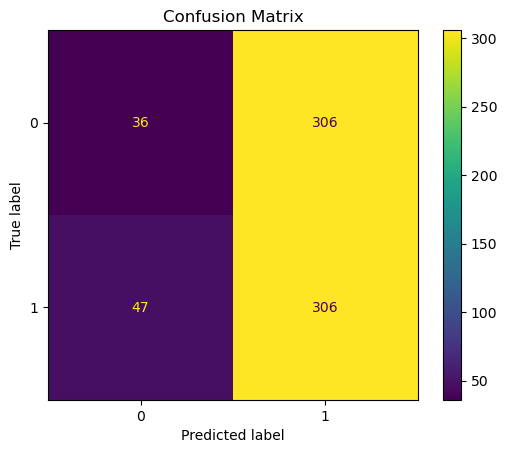

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)

# Evaluate the modelet by means of a Confusion Matrix
matrix = ConfusionMatrixDisplay.from_estimator(modellr, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

### Figure 11. Confusion Matrix Logistic Regression

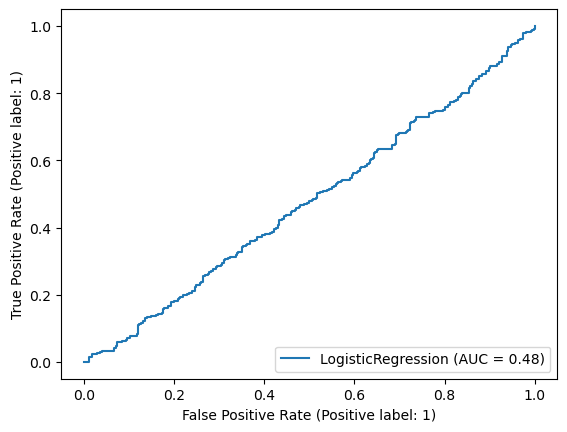

In [31]:
 #ROC Curve
log_disp = RocCurveDisplay.from_estimator(modellr, X_test, Y_test)

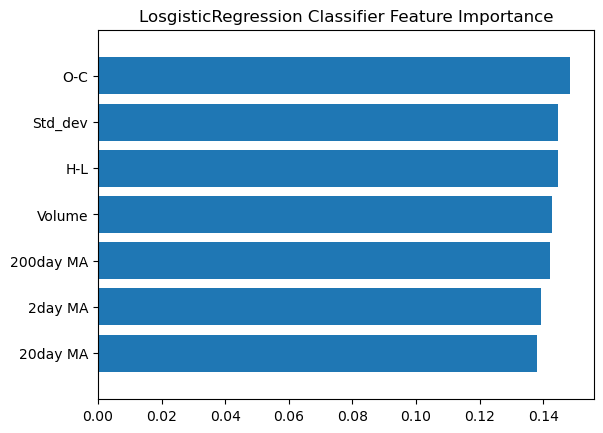

In [32]:
#Importance of classifiers 
feature_names=X.columns
importance = modelet.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("LosgisticRegression Classifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

### Figure 12. Roc Curve Logistic Regression

##  Cross Validation for Extra Tree

In [33]:
accuracy_scores = cross_val_score(modelet, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation Accuracy: {accuracy_scores.std():.2f}")


Mean Accuracy: 0.49
Standard Deviation Accuracy: 0.02


### Figure 11. Cross Validation of Extra Trees

## Prediction of Price Rise Using Extra Trees on X_test Data

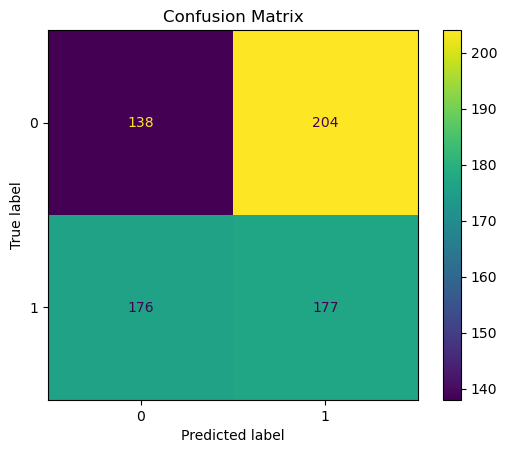

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_et)

# Evaluate the modelet by means of a Confusion Matrix
matrix = ConfusionMatrixDisplay.from_estimator(modelet, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

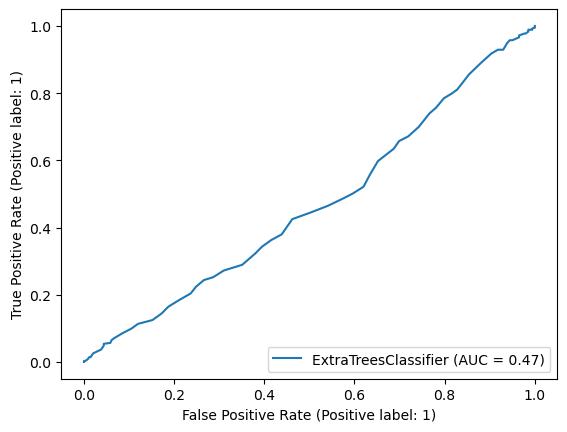

In [35]:
# ROC Curve
log_disp = RocCurveDisplay.from_estimator(modelet, X_test, Y_test)

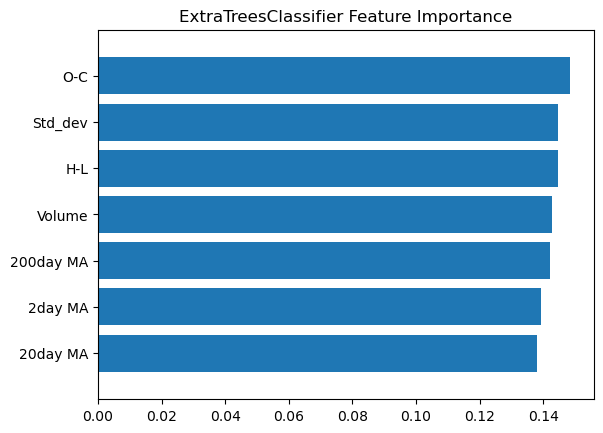

In [36]:
#Importance of classifiers 
feature_names=X.columns
importance = modelet.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()

## Market and Return Strategies

## Data Preprocessing

In [37]:
#Create new column Y_pred
tscodata['Y_pred_lr'] = np.NaN
tscodata.iloc[(len(tscodata) - len(Y_pred_lr)):,-1] = Y_pred_lr
tscodata['Y_pred_et'] = np.NaN
tscodata.iloc[(len(tscodata) - len(Y_pred_et)):,-1] = Y_pred_et
trade_tscodata = tscodata.dropna()
trade_tscodata

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,2day MA,20day MA,200day MA,Std_dev,Price_Rise,Y_pred_lr,Y_pred_et
Date,,,,,,,,,,,,,,,
2021-03-29,177.910004,178.559998,175.020004,175.690002,167.121231,757800,3.539993,-2.220001,175.459999,166.621000,145.64660,3.572187,1,1.0,0.0
2021-03-30,175.979996,179.250000,175.979996,177.050003,168.414932,927500,3.270004,1.070007,177.084999,167.278500,145.92900,3.794289,1,1.0,1.0
2021-03-31,178.139999,178.970001,175.380005,177.080002,168.443451,1113800,3.589996,-1.059998,176.370003,168.185500,146.22200,2.295618,0,1.0,1.0
2021-04-01,177.449997,178.039993,175.050003,176.500000,167.891739,1039300,2.989990,-0.949997,177.065002,169.285500,146.50005,1.019483,1,1.0,0.0
2021-04-05,177.910004,180.850006,176.729996,180.350006,171.553940,903500,4.120010,2.440002,176.790001,170.525000,146.76335,1.777621,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,212.690002,215.320007,211.330002,211.919998,210.947525,1004900,3.990005,-0.770004,210.739998,210.277002,217.84185,2.767223,0,1.0,0.0
2023-12-26,211.500000,212.570007,210.619995,210.729996,209.762970,849700,1.950012,-0.770004,211.809998,210.963502,217.76690,2.437352,1,1.0,1.0
2023-12-27,210.729996,213.789993,209.000000,212.639999,211.664215,829300,4.789993,1.910004,211.324997,211.611002,217.68435,1.113634,1,1.0,1.0


## Computation of market returns 

In [38]:
trade_tscodata['Tomorrows Returns'] = 0.
trade_tscodata['Tomorrows Returns'] = np.log(trade_tscodata['Close']/trade_tscodata['Close'].shift(1))
trade_tscodata['Tomorrows Returns'] = trade_tscodata['Tomorrows Returns'].shift(-1)
trade_tscodata

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,2day MA,20day MA,200day MA,Std_dev,Price_Rise,Y_pred_lr,Y_pred_et,Tomorrows Returns
Date,,,,,,,,,,,,,,,,
2021-03-29,177.910004,178.559998,175.020004,175.690002,167.121231,757800,3.539993,-2.220001,175.459999,166.621000,145.64660,3.572187,1,1.0,0.0,0.007711
2021-03-30,175.979996,179.250000,175.979996,177.050003,168.414932,927500,3.270004,1.070007,177.084999,167.278500,145.92900,3.794289,1,1.0,1.0,0.000169
2021-03-31,178.139999,178.970001,175.380005,177.080002,168.443451,1113800,3.589996,-1.059998,176.370003,168.185500,146.22200,2.295618,0,1.0,1.0,-0.003281
2021-04-01,177.449997,178.039993,175.050003,176.500000,167.891739,1039300,2.989990,-0.949997,177.065002,169.285500,146.50005,1.019483,1,1.0,0.0,0.021579
2021-04-05,177.910004,180.850006,176.729996,180.350006,171.553940,903500,4.120010,2.440002,176.790001,170.525000,146.76335,1.777621,0,1.0,0.0,-0.004669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,212.690002,215.320007,211.330002,211.919998,210.947525,1004900,3.990005,-0.770004,210.739998,210.277002,217.84185,2.767223,0,1.0,0.0,-0.005631
2023-12-26,211.500000,212.570007,210.619995,210.729996,209.762970,849700,1.950012,-0.770004,211.809998,210.963502,217.76690,2.437352,1,1.0,1.0,0.009023
2023-12-27,210.729996,213.789993,209.000000,212.639999,211.664215,829300,4.789993,1.910004,211.324997,211.611002,217.68435,1.113634,1,1.0,1.0,0.015215


## Computation of strategy returns 

In [39]:
#Strategy Returns based on Y_Pred
trade_tscodata['Strategy Returns lr'] = 0.
trade_tscodata['Strategy Returns lr'] = np.where(trade_tscodata['Y_pred_lr'] == True,
                                 trade_tscodata['Tomorrows Returns'], - trade_tscodata['Tomorrows Returns'])
trade_tscodata['Strategy Returns et'] = 0.
trade_tscodata['Strategy Returns et'] = np.where(trade_tscodata['Y_pred_et'] == True,
                                 trade_tscodata['Tomorrows Returns'], - trade_tscodata['Tomorrows Returns'])
trade_tscodata

,Open,High,Low,Close,Adj Close,Volume,H-L,O-C,2day MA,20day MA,200day MA,Std_dev,Price_Rise,Y_pred_lr,Y_pred_et,Tomorrows Returns,Strategy Returns lr,Strategy Returns et
Date,,,,,,,,,,,,,,,,,,
2021-03-29,177.910004,178.559998,175.020004,175.690002,167.121231,757800,3.539993,-2.220001,175.459999,166.621000,145.64660,3.572187,1,1.0,0.0,0.007711,0.007711,-0.007711
2021-03-30,175.979996,179.250000,175.979996,177.050003,168.414932,927500,3.270004,1.070007,177.084999,167.278500,145.92900,3.794289,1,1.0,1.0,0.000169,0.000169,0.000169
2021-03-31,178.139999,178.970001,175.380005,177.080002,168.443451,1113800,3.589996,-1.059998,176.370003,168.185500,146.22200,2.295618,0,1.0,1.0,-0.003281,-0.003281,-0.003281
2021-04-01,177.449997,178.039993,175.050003,176.500000,167.891739,1039300,2.989990,-0.949997,177.065002,169.285500,146.50005,1.019483,1,1.0,0.0,0.021579,0.021579,-0.021579
2021-04-05,177.910004,180.850006,176.729996,180.350006,171.553940,903500,4.120010,2.440002,176.790001,170.525000,146.76335,1.777621,0,1.0,0.0,-0.004669,-0.004669,0.004669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,212.690002,215.320007,211.330002,211.919998,210.947525,1004900,3.990005,-0.770004,210.739998,210.277002,217.84185,2.767223,0,1.0,0.0,-0.005631,-0.005631,0.005631
2023-12-26,211.500000,212.570007,210.619995,210.729996,209.762970,849700,1.950012,-0.770004,211.809998,210.963502,217.76690,2.437352,1,1.0,1.0,0.009023,0.009023,0.009023
2023-12-27,210.729996,213.789993,209.000000,212.639999,211.664215,829300,4.789993,1.910004,211.324997,211.611002,217.68435,1.113634,1,1.0,1.0,0.015215,0.015215,0.015215


## Cummulative Market and Strategies Returns

## Computation of cummulative market and strategy returns 

In [40]:
trade_tscodata['Cumulative Market Returns'] = np.cumsum(trade_tscodata['Tomorrows Returns'])
trade_tscodata['Cumulative Strategy Returns lr'] = np.cumsum(trade_tscodata['Strategy Returns lr'])
trade_tscodata['Cumulative Strategy Returns et'] = np.cumsum(trade_tscodata['Strategy Returns et'])

Fig 11: Plot of cummulative market and strategy returns based on Y_prediction

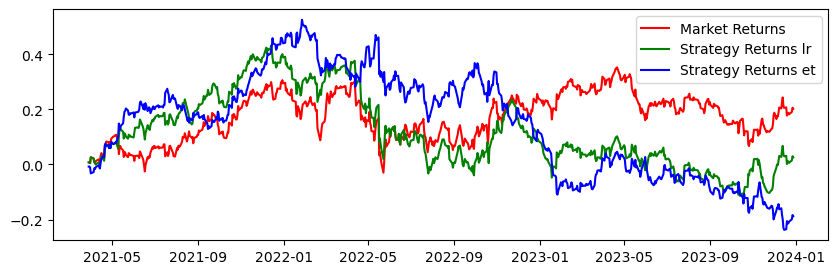

In [41]:
plt.figure(figsize=(10,3))
plt.plot(trade_tscodata['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_tscodata['Cumulative Strategy Returns lr'], color='g', label='Strategy Returns lr')
plt.plot(trade_tscodata['Cumulative Strategy Returns et'], color='b', label='Strategy Returns et')
plt.legend()
plt.show()


### Figure 13. Plot of cumulative market returns, and strategy returns based on Y_Prediction.